# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Give server 1 seconds break in between each iteration
    time.sleep(1)
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | happy valley-goose bay
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | cimitarra
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | qui nhon
Processing Record 9 of Set 1 | san luis de la loma
Processing Record 10 of Set 1 | springbok
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | coronel dorrego
Processing Record 13 of Set 1 | namibe
Processing Record 14 of Set 1 | richards bay
Processing Record 15 of Set 1 | nadi
Processing Record 16 of Set 1 | petrolina
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | ingeniero jacobacci
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of 

In [6]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,10.45,46,19,1.48,RU,1722993409
1,adamstown,-25.0660,-130.1015,18.79,65,18,4.61,PN,1722993410
2,punta arenas,-53.1500,-70.9167,-1.94,93,75,2.57,CL,1722993411
3,happy valley-goose bay,53.3168,-60.3315,15.17,58,75,2.57,CA,1722993412
4,yellowknife,62.4560,-114.3525,20.79,41,20,4.63,CA,1722993413


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,10.45,46,19,1.48,RU,1722993409
1,adamstown,-25.0660,-130.1015,18.79,65,18,4.61,PN,1722993410
2,punta arenas,-53.1500,-70.9167,-1.94,93,75,2.57,CL,1722993411
3,happy valley-goose bay,53.3168,-60.3315,15.17,58,75,2.57,CA,1722993412
4,yellowknife,62.4560,-114.3525,20.79,41,20,4.63,CA,1722993413


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [10]:
# define Current date
from datetime import datetime

# Get the current date
current_date = datetime.now().date()

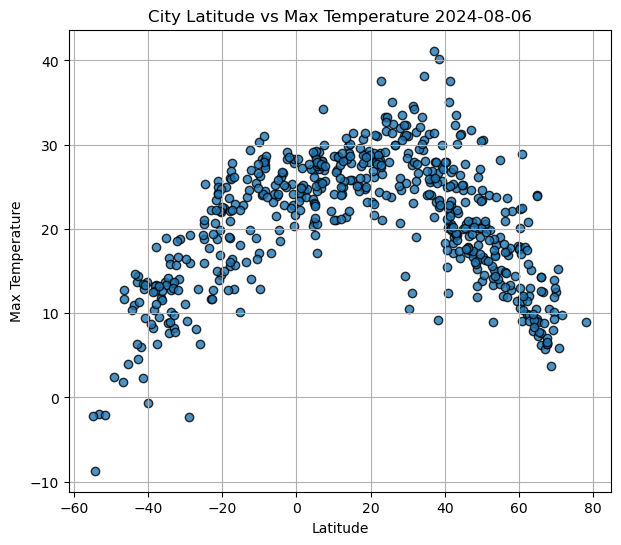

In [11]:
# Build scatter plot for latitude vs. temperature
fig1, ax1 = plt.subplots(figsize=(7,6))

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha= 0.80, edgecolors= "k" , linewidths= 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude vs Max Temperature {current_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

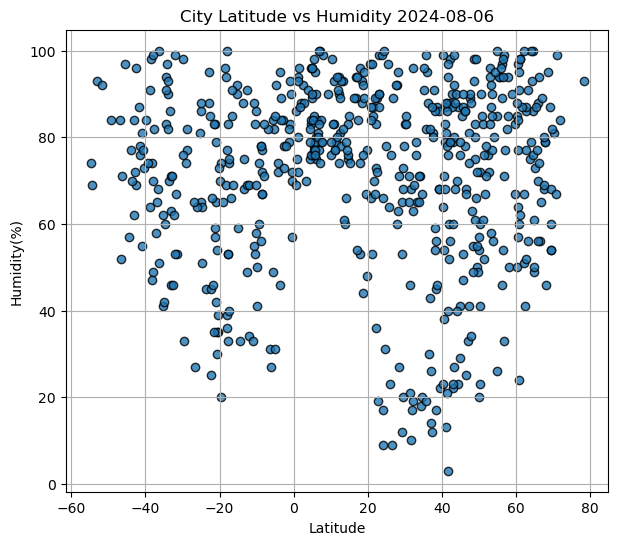

In [12]:
# Build the scatter plots for latitude vs. humidity
fig1, ax1 = plt.subplots(figsize=(7,6))

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha= 0.80, edgecolors= "k" , linewidths= 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs Humidity {current_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

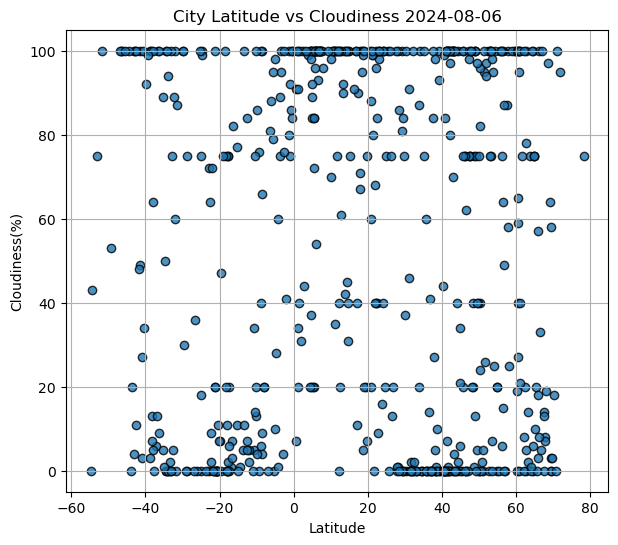

In [13]:
# Build the scatter plots for latitude vs. cloudiness
fig1, ax1 = plt.subplots(figsize=(7,6))

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha= 0.80, edgecolors= "k" , linewidths= 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs Cloudiness {current_date}")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

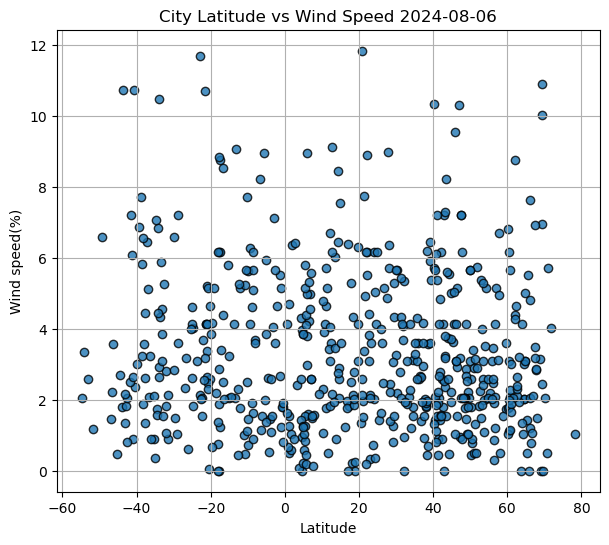

In [14]:
# Build the scatter plots for latitude vs. wind speed
fig1, ax1 = plt.subplots(figsize=(7,6))

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha= 0.80, edgecolors= "k" , linewidths= 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind speed(%)")
plt.title(f"City Latitude vs Wind Speed {current_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, alpha= 0.80, edgecolors= "k" , linewidths= 1)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,10.45,46,19,1.48,RU,1722993409
3,happy valley-goose bay,53.3168,-60.3315,15.17,58,75,2.57,CA,1722993412
4,yellowknife,62.4560,-114.3525,20.79,41,20,4.63,CA,1722993413
5,cimitarra,6.3142,-73.9497,25.57,84,100,1.60,CO,1722993414
6,qui nhon,13.7667,109.2333,29.89,60,42,0.88,VN,1722993416


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,18.79,65,18,4.61,PN,1722993410
2,punta arenas,-53.1500,-70.9167,-1.94,93,75,2.57,CL,1722993411
8,springbok,-29.6643,17.8865,9.13,33,30,1.48,ZA,1722993418
10,coronel dorrego,-38.7187,-61.2873,8.23,91,100,7.71,AR,1722993421
11,namibe,-15.1961,12.1522,18.06,92,11,2.05,AO,1722993422


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6613987663206353


Text(0.5, 1.0, 'Northern Hemisphere: Latitude vs Max Temperature (C) 2024-08-06')

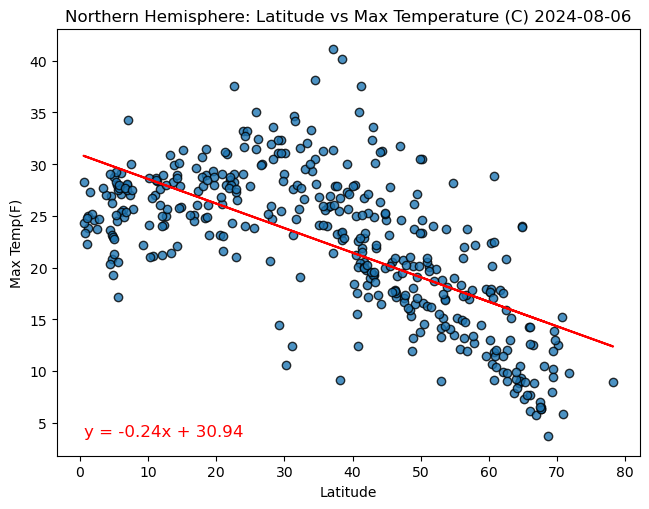

In [26]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title(f"Northern Hemisphere: Latitude vs Max Temperature (C) {current_date}")

The r-value is: 0.8035293113097929


Text(0.5, 1.0, 'Southern Hemisphere: Latitude vs Max Temperature (C) 2024-08-06')

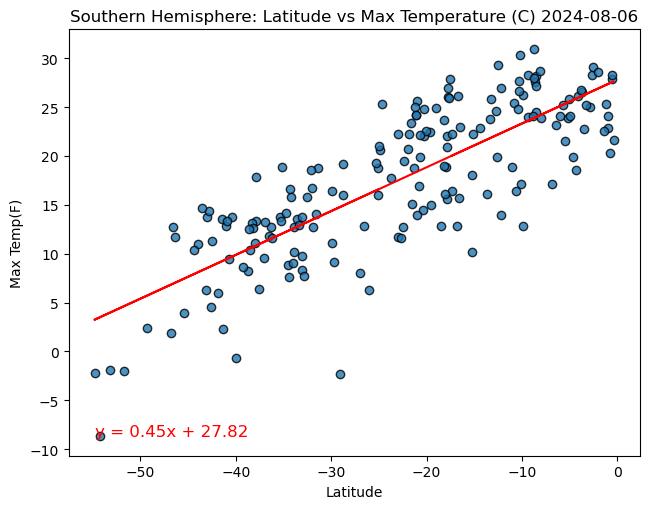

In [27]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title(f"Southern Hemisphere: Latitude vs Max Temperature (C) {current_date}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.1247673210414288


Text(0.5, 1.0, 'Northern Hemisphere: Latitude vs Humidity(%) 2024-08-06')

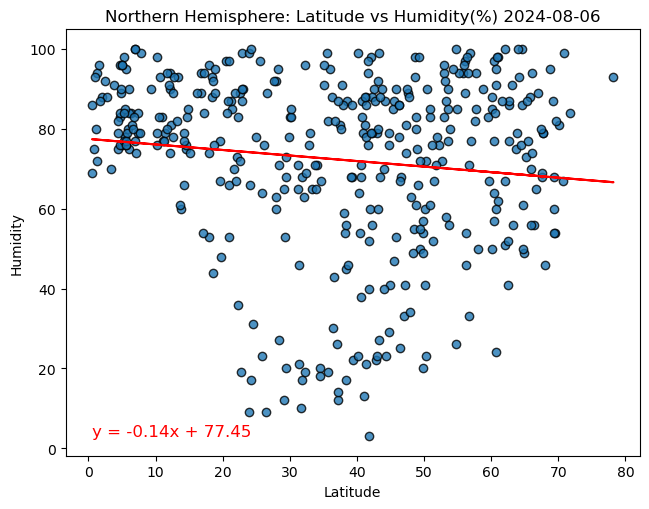

In [28]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Northern Hemisphere: Latitude vs Humidity(%) {current_date}")

The r-value is: -0.09901471461169525


Text(0.5, 1.0, 'Southern Hemisphere: Latitude vs Humidity (%) 2024-08-06')

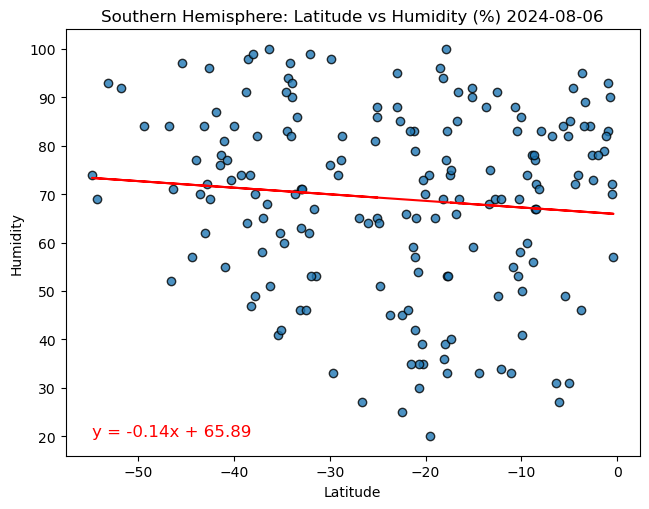

In [29]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Southern Hemisphere: Latitude vs Humidity (%) {current_date}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.2732278245829262


Text(0.5, 1.0, 'Northern Hemisphere: Latitude vs Cloudiness (%) 2024-08-06')

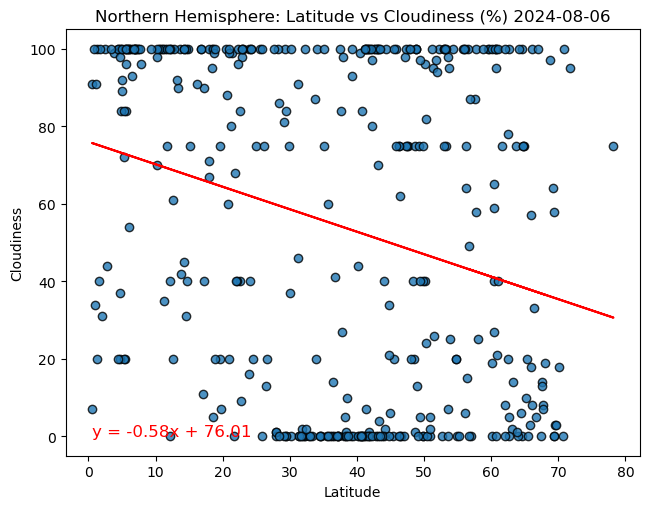

In [30]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere: Latitude vs Cloudiness (%) {current_date}")

The r-value is: -0.03475597490174915


Text(0.5, 1.0, 'Southern Hemisphere: Latitude vs Cloudiness(%) 2024-08-06')

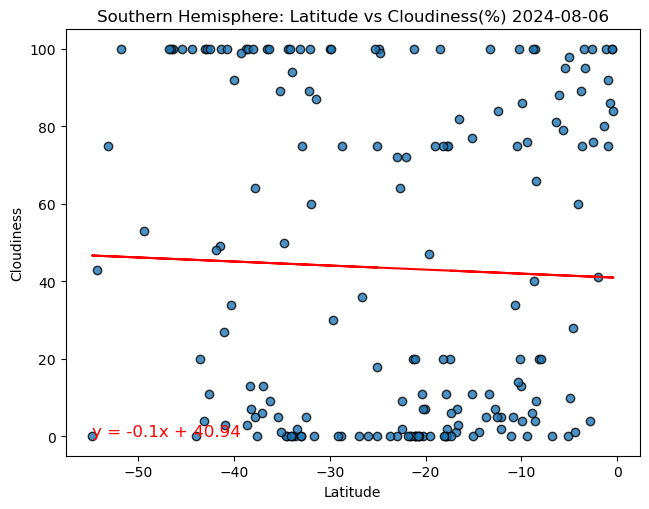

In [31]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere: Latitude vs Cloudiness(%) {current_date}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.016368985255088675


Text(0.5, 1.0, 'Northern Hemisphere:  Latitude vs Wind Speed  (m/s) 2024-08-06')

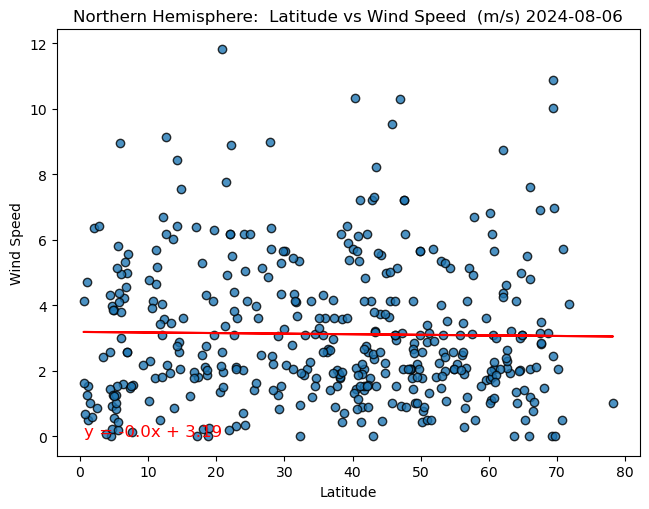

In [32]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Northern Hemisphere:  Latitude vs Wind Speed  (m/s) {current_date}")

The r-value is: -0.005335310039286058


Text(0.5, 1.0, 'Southern Hemisphere: Latitude vs Wind Speed (m/s) 2024-08-06')

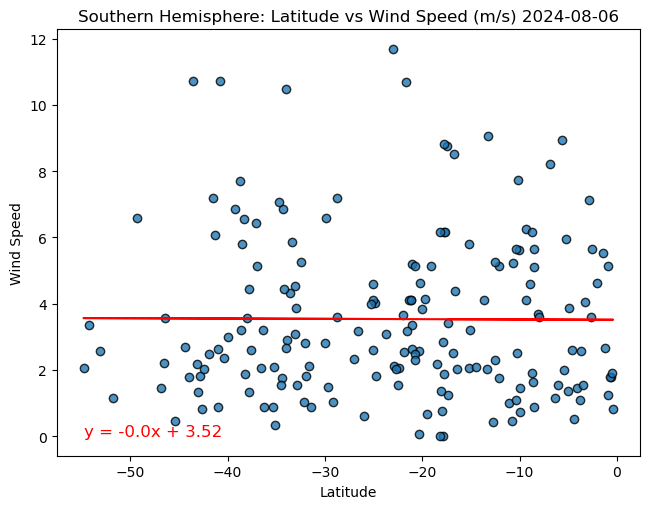

In [33]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Southern Hemisphere: Latitude vs Wind Speed (m/s) {current_date}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE